In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os



from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
picture_size = 48
folder_path = "/kaggle/input/face-expression-recognition-dataset/images/"

In [3]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [4]:

    
    from keras.optimizers import Adam,SGD,RMSprop


    no_of_classes = 7

    model = Sequential()


    model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))


    model.add(Conv2D(128,(5,5),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))


    model.add(Conv2D(512,(3,3),padding = 'same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout (0.25))


    model.add(Conv2D(512,(3,3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())


    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))



    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(no_of_classes, activation='softmax'))



    opt = Adam(lr = 0.0001)
    model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:

    from keras.optimizers import RMSprop,SGD,Adam
    from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

    checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

    early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True
                              )

    reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                  factor=0.2,
                                  patience=3,
                                  verbose=1,
                                  min_delta=0.0001)

    callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

    epochs = 48

    model.compile(loss='categorical_crossentropy',
                  optimizer = Adam(lr=0.001),
                  metrics=['accuracy'])

In [6]:
history = model.fit_generator(generator=train_set,
                                    steps_per_epoch=train_set.n//train_set.batch_size,
                                    epochs=epochs,
                                    validation_data = test_set,
                                    validation_steps = test_set.n//test_set.batch_size,
                                    callbacks=callbacks_list
                                    )

/tmp/ipykernel_28/1682586274.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48


2023-08-31 15:43:15.238742: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


225/225 [==============================] - 261s 1s/step - loss: 1.7680 - accuracy: 0.3189 - val_loss: 1.5830 - val_accuracy: 0.4021 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 52s 231ms/step - loss: 1.4332 - accuracy: 0.4525 - val_loss: 1.8017 - val_accuracy: 0.4119 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 71s 316ms/step - loss: 1.2708 - accuracy: 0.5162 - val_loss: 1.2834 - val_accuracy: 0.5058 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 58s 256ms/step - loss: 1.1936 - accuracy: 0.5461 - val_loss: 1.3096 - val_accuracy: 0.4810 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 52s 231ms/step - loss: 1.1257 - accuracy: 0.5725 - val_loss: 1.2110 - val_accuracy: 0.5435 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 50s 224ms/step - loss: 1.0774 - accuracy: 0.5910 - val_loss: 1.1550 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 52s 231ms/s

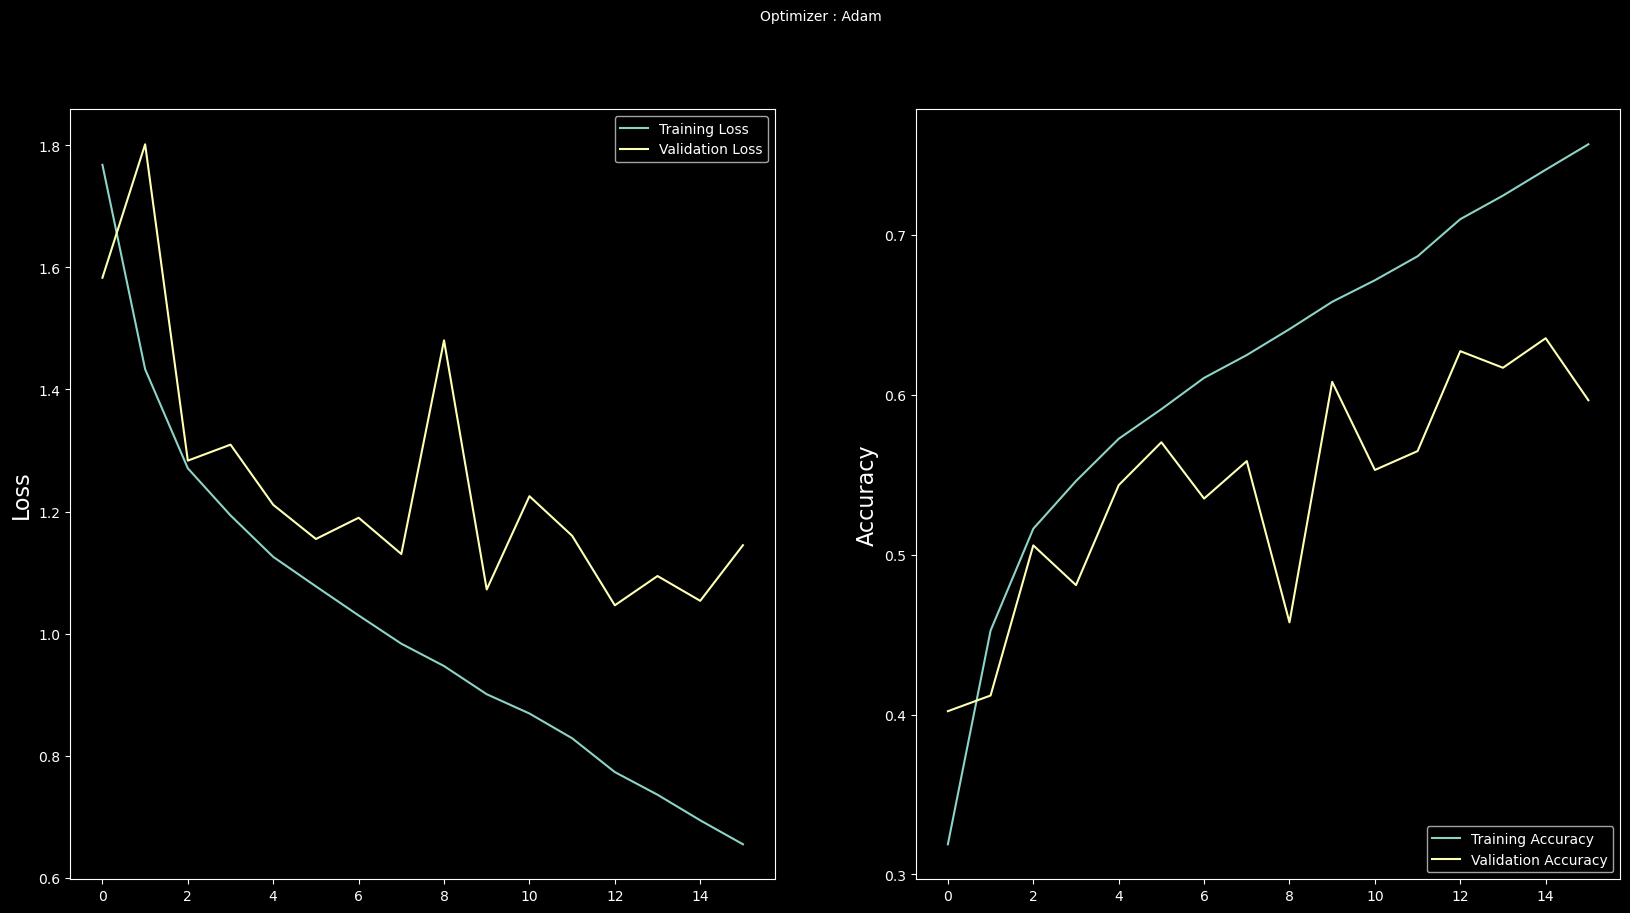

In [7]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()